In [1]:
import pandas as pd
import numpy as np

fake_filepath = r"C:\Users\vm658\Documents\SVSM\Research\Code\DataSet_Misinfo_FAKE.csv"
true_filepath = r"C:\Users\vm658\Documents\SVSM\Research\Code\DataSet_Misinfo_TRUE.csv"

In [2]:
fake_df = pd.read_csv(fake_filepath)
fake_df['label'] = 0
#remove first column
fake_df = fake_df.drop(fake_df.columns[0], axis=1)
#drop empty rows
fake_df = fake_df.dropna(how = 'any')
fake_df.drop_duplicates(subset = ['text'], inplace=True)
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34078 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34078 non-null  object
 1   label   34078 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 798.7+ KB


In [3]:
true_df = pd.read_csv(true_filepath, encoding = 'latin-1')
true_df['label'] = 1
#remove first column
true_df = true_df.drop(true_df.columns[0], axis=1)
#drop empty rows
true_df = true_df.dropna(how = 'any')
true_df.drop_duplicates(subset = ['text'], inplace=True)
true_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34526 entries, 0 to 34974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34526 non-null  object
 1   label   34526 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 809.2+ KB


In [5]:
df = pd.concat([true_df,fake_df])
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68604 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    68604 non-null  object
 1   label   68604 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
5,The White House said on Friday it was set to k...,1
6,President Donald Trump said on Thursday he bel...,1
7,While the Fake News loves to talk about my so-...,1
8,"Together, we are MAKING AMERICA GREAT AGAIN! b...",1
9,Alabama Secretary of State John Merrill said h...,1


In [6]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
#add more punctuation
punctuations = string.punctuation + "’‘“”"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in punctuations])
    return no_punct

In [8]:
#remove punctuation
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
#make all text lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
#tokenize 
df['text_token'] = df['text'].apply(nltk.word_tokenize)
df['text_token'].head()


0    [the, head, of, a, conservative, republican, f...
1    [transgender, people, will, be, allowed, for, ...
2    [the, special, counsel, investigation, of, lin...
3    [trump, campaign, adviser, george, papadopoulo...
4    [president, donald, trump, called, on, the, us...
Name: text_token, dtype: object

In [9]:
#remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is', 'it', 'to', 'be', 'said', 'he', 'one', 'that', 'also', 'in', 'this', 'are', 'an', 'you', 'they'])
for sentence in df['text_token']:
    for word in sentence:
        if word in stop_words:
            sentence.remove(word)
df['text_token'].head()

0    [head, conservative, republican, faction, us, ...
1    [transgender, people, allowed, first, time, en...
2    [special, counsel, investigation, links, russi...
3    [trump, campaign, adviser, george, papadopoulo...
4    [president, donald, trump, called, us, postal,...
Name: text_token, dtype: object

In [10]:
#lemmatizing
#stemming
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
#stem text
#df['text_stem'] = df['text_token'].apply(lambda x: [stemmer.stem(y) for y in x])
#df.head()

In [12]:
#lemmatize text
df['text_lem'] = df['text_token'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

for sentence in df['text_lem']:
    for word in sentence:
        if word in stop_words:
            sentence.remove(word)
df['text_lem'].head()

0    [head, conservative, republican, faction, u, c...
1    [transgender, people, allowed, first, time, en...
2    [special, counsel, investigation, link, russia...
3    [trump, campaign, adviser, george, papadopoulo...
4    [president, donald, trump, called, u, postal, ...
Name: text_lem, dtype: object

In [13]:
#counts words
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#combine all the lemmatized lists into one list
counts = Counter()
text_lem = df['text_lem']
text_lem.apply(lambda x: counts.update(x)) # counts.update(x) adds the words in x to the counter
counts.most_common(20) # shows the 20 most common words


#counts words and shows a barh graph of the top 20 words
#counted = Counter(text)
word_freq = pd.DataFrame(counts.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

c:\Users\vm658\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vm658\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vm658\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


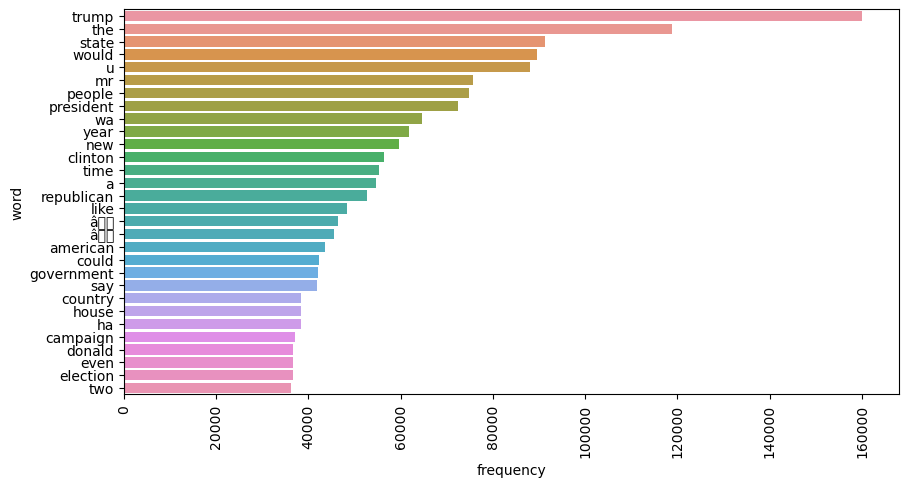

,word,frequency
1201,is,16269


In [15]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'frequency', y = 'word', data = word_freq[:30])
plt.xticks(rotation = 90)
plt.show()
word_freq.loc[word_freq['word'] == 'is']